In [ ]:
#!pip install tensorflow==2.0.0-alpha0
#!pip install opencv-python



In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

# Importamos TF2 y Keras
import tensorflow as tf
from tensorflow import keras

#Usaremos datetime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt

#para cargar imágenes desde internet usaremos estas librerías
from PIL import Image
import requests
from io import BytesIO

# lo usaremos para reescalar imagen
import cv2

#!rm -rf ./logs/

#nos aseguramos de que estemos con tf 2.0
print(tf.__version__)

/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jdg/anaconda3/envs/DataScience/lib

2.0.0-alpha0


/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jdg/anaconda3/envs/DataScience/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jdg/anaconda3

## Importamos el dataset
Usaremos 60,000 imágenes para entrenar la red y 10,000 imágenes para evaluar con qué precisión aprendió la red para clasificar las imágenes. Podemos acceder al Fashion MNIST directamente desde TensorFlow. <br><br>Importamos y cargamos los datos de Fashion MNIST directamente desde TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

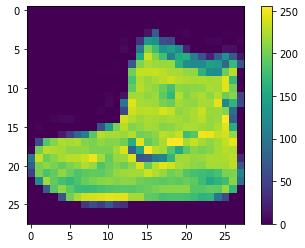

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Las etiquetas son una matriz de enteros, que van de 0 a 9. Estas corresponden a la clase de vestimenta que representa la imagen:


In [5]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

<br><br>
## Exploramos datos

In [6]:
train_images[0].shape

(28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

<br><br>
## Pre - Procesamiento de datos

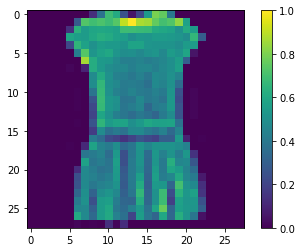

In [12]:
train_images = train_images / 255
test_images = test_images / 255

plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

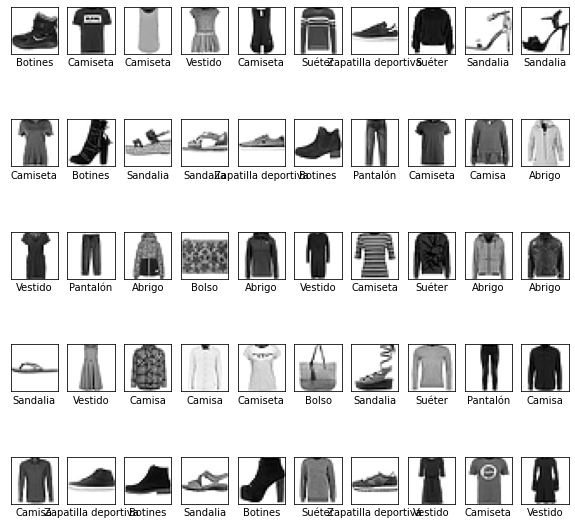

In [13]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

<br><br>
## Configuramos la red neuronal
<img src="https://cdn-images-1.medium.com/max/1200/1*DpMaU1p85ZSgamwYDkzL-A.png">

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

<br><br>
## En clasificación
### Target con codificación one hot tensorflow -> categorical_crossentropy
<br><br>
img1->    0   |  0   |   0   |   0   |   0   |   0   |  1   |   0   |  0   |   0 <br>
img2->    0   |  0   |   1   |   0   |   0   |   0   |  0   |   0   |  0   |   0 <br>

<img src="https://i.imgur.com/mtimFxh.png">
<br><br><br><br>

#### Target con enteros para representar categoría -> sparse_categorical_crossentropy
<br><br>
img1-> 2<br>
img2-> 6<br>
<br><br><br>
## En regresiónes 
### loss='mse'
<br><br><br>
## Optimizadores
<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Comparación de Adam con otros algoritmos de optimización que entrenan a un perceptrón multicapa" >


In [17]:
checkpoint_path = "checkpoints/check";
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)

model.fit(train_images,
          train_labels, 
          epochs=50,
          validation_data = (test_images,test_labels),
          callbacks = [cp_callbacks, tensorboard_callback])

# luego ejecuar en terminal 
# tensorboard --logdir logs/fit

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
59840/60000 [============================>.] - ETA: 0s - loss: 0.6026 - accuracy: 0.7975
Epoch 00001: saving model to checkpoints/check
60000/60000 [==============================] - 1s 23us/sample - loss: 0.6023 - accuracy: 0.7976 - val_loss: 0.4881 - val_accuracy: 0.8352
Epoch 2/50
57920/60000 [===========================>..] - ETA: 0s - loss: 0.4517 - accuracy: 0.8436
Epoch 00002: saving model to checkpoints/check
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4526 - accuracy: 0.8432 - val_loss: 0.4569 - val_accuracy: 0.8380
Epoch 3/50
57664/60000 [===========================>..] - ETA: 0s - loss: 0.4229 - accuracy: 0.8543
Epoch 00003: saving model to checkpoints/check
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4219 - accuracy: 0.8546 - val_loss: 0.4630 - val_accuracy: 0.8379
Epoch 4/50
57696/60000 [===========================>..] - ETA: 0s - loss: 0.4048 - accuracy: 0.

Epoch 30/50
59520/60000 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.8888
Epoch 00030: saving model to checkpoints/check
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3099 - accuracy: 0.8888 - val_loss: 0.4183 - val_accuracy: 0.8539
Epoch 31/50
59680/60000 [============================>.] - ETA: 0s - loss: 0.3078 - accuracy: 0.8894
Epoch 00031: saving model to checkpoints/check
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3079 - accuracy: 0.8893 - val_loss: 0.4153 - val_accuracy: 0.8577
Epoch 32/50
57920/60000 [===========================>..] - ETA: 0s - loss: 0.3078 - accuracy: 0.8887
Epoch 00032: saving model to checkpoints/check
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3077 - accuracy: 0.8885 - val_loss: 0.4200 - val_accuracy: 0.8578
Epoch 33/50
59104/60000 [============================>.] - ETA: 0s - loss: 0.3068 - accuracy: 0.8893
Epoch 00033: saving model to checkpoints/

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Precisión -> ", test_acc)

10000/10000 [==============================] - 0s 11us/sample - loss: 0.4250 - accuracy: 0.8565
Precisión ->  0.8565


<br><br>
## Hagamos predicciones

In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([2.9185682e-11, 1.8063667e-17, 4.7007025e-09, 1.7231160e-08,
       1.7423753e-10, 1.1621173e-03, 4.0137799e-10, 2.8269457e-02,
       4.6196305e-06, 9.7056377e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])


9

<br><br>
## Probemos el modelo con una imagen externa y ajena al dataset 
<br><br>
**Muy importante:**<br><br> La Imagen a comprobar debe ser ingresada luego de recibir el mismo procesamiento que recibieron las imágenes de entrenamiento

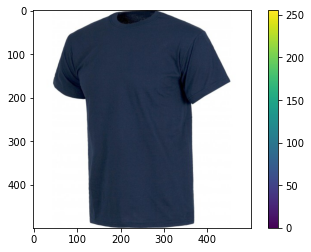

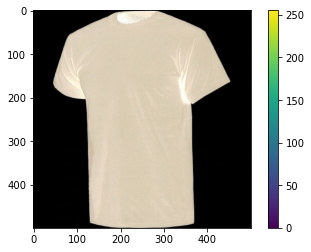

In [22]:
# cargamos una imagen a partir de una url

response = requests.get("https://www.turopalaboral.com/2893-home_default/camiseta-s6600-manga-corta-pack-3-unidades-workteam.jpg")
img = Image.open(BytesIO(response.content))

np_img = np.array(img)

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

#invertimos la imagen
np_img = 255 - np_img

# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [23]:
np_img.shape

(500, 500, 3)

In [24]:
# observamos que la imagen importada tiene 3 dimensiones, 
# porque es a color.
# por eso declaramos esta función para convertir la imagen a color a escala de grises
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.333, 0.333, 0.333])

In [25]:
bw_image = rgb2gray(np_img)

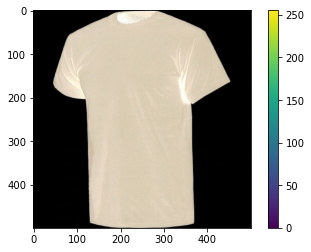

In [26]:
# mostramos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
bw_image.shape

(500, 500)

In [28]:
# Ahora a la imagen en blanco y negro debemos redimensionarla a 28x28
res = cv2.resize(bw_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

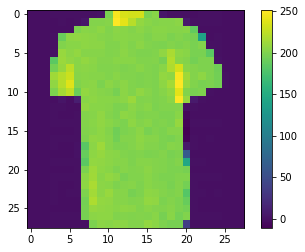

In [29]:
# Mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

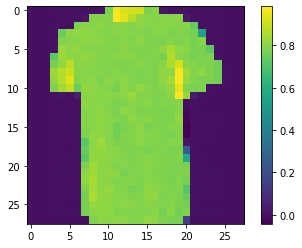

In [30]:
res = res / 255

# Mostramos la imagen
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
x = np.zeros((1,28,28))
x.shape

(1, 28, 28)

In [32]:
x[0] = np.array(res)

In [35]:
predictions = model.predict(x)
predictions[0]

array([9.8643678e-01, 5.2571856e-08, 1.2306910e-03, 2.0077340e-04,
       3.9004433e-04, 0.0000000e+00, 1.1741667e-02, 3.6798715e-34,
       1.7230111e-08, 3.1040866e-34], dtype=float32)

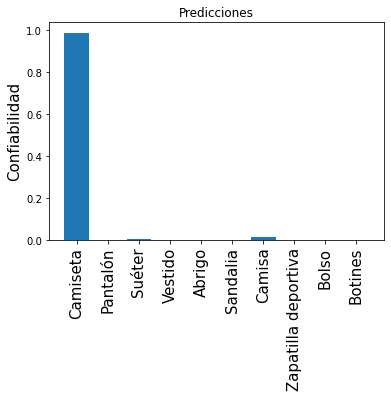

In [36]:
index = np.arange(len(class_names))
plt.bar(index, predictions[0])
plt.ylabel('Confiabilidad', fontsize=15)
plt.xticks(index, class_names, fontsize=15, rotation=90)
plt.title('Predicciones')
plt.show()

## Creamos un nuevo modelo y lo probamos antes de entrenarlo

In [41]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
loss, acc = model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 14us/sample - loss: 2.2930 - accuracy: 0.1188


In [43]:
acc

0.1188

### Como vemos el rendimiento es pésimo
### Cargamos los pesos grabados anteriormente y probamos nuevamente

In [45]:
model2.load_weights(checkpoint_path)
loss, acc = model2.evaluate(test_images, test_labels)
acc

10000/10000 [==============================] - 0s 11us/sample - loss: 0.4250 - accuracy: 0.8565


0.8565